# Курс Data Science
## Модуль 13.2 Домашняя работа

В уроке мы разобрали построение модели kNN на базовом наборе данных Iris. Для лучшего понимания, как работает алгоритм, мы использовали только два признака - длину и ширину лепестка. 

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов. 

### Часть 1.
Поочередно добавьте к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

In [86]:
from sklearn.datasets import load_iris

Напомним порядок расположения признаков в массиве данных

In [87]:
iris_dataset = load_iris()
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Для формирования массива новых признаков проще воспользоваться не срезами, как мы делали в уроке - iris_dataset.data[:, 2:4] (здесь мы показываем, что выбираем только со 2го по 4й столбец, причем не включая 2й), а просто удалить один из ненужных нам столбцов с помощью функции библиотеки *numpy.delete*

In [88]:
import numpy as np

In [89]:
iris_dataset_1 = np.delete(iris_dataset.data, 1, axis=1)
iris_dataset_2 = np.delete(iris_dataset.data, 0, axis=1)

### Часть 2.
Теперь посмотрите на трехмерном графике, насколько хорошо данные разделяются по каждой из совокупностей трех параметров.

In [90]:
# если работаете в интерактивной оболочке IPython 
%matplotlib inline

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

**Примечание: для установки цвета в функции используйте *c=iris_dataset.target*.**

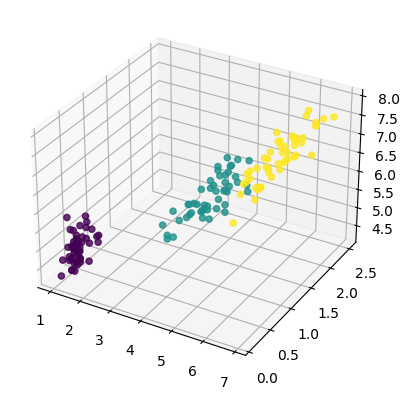

In [91]:
ax = plt.axes(projection='3d')
zdata = iris_dataset_1[:,0]
xdata = iris_dataset_1[:,1]
ydata = iris_dataset_1[:,2]
ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=iris_dataset.target)

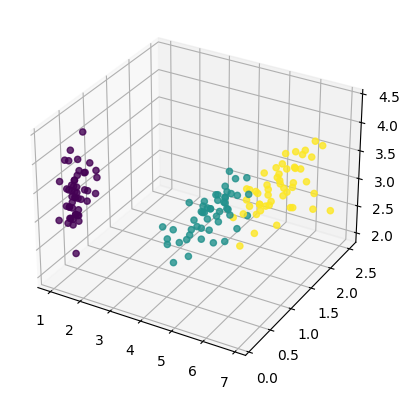

In [92]:
ax = plt.axes(projection='3d')
zdata = iris_dataset_2[:,0]
xdata = iris_dataset_2[:,1]
ydata = iris_dataset_2[:,2]
ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=iris_dataset.target)

### Часть 3.
С помощью функции sklearn.model_selection.train_test_split разделите данные на тренировочный и тестовый датасеты и затем, применив библиотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [94]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(iris_dataset_1, iris_dataset.target, random_state=13)
knn = KNeighborsClassifier(n_neighbors=5)
knn_model1 = knn.fit(x_train_1, y_train_1)
knn_predict1 = knn.predict(x_test_1)

In [95]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(iris_dataset_2, iris_dataset.target, random_state=13)
knn_model2 = knn.fit(x_train_2, y_train_2)
knn_predict2 = knn.predict(x_test_2)

### Часть 4.
Проверьте точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
accuracy_1 = accuracy_score(y_test_1, knn_predict1)
accuracy_2 = accuracy_score(y_test_2, knn_predict2)

print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')

Accuracy_1: 0.9210526315789473, accuracy_2: 0.9736842105263158


### Часть 5.
Постройте модель на данных *x_train_1, y_train_1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

*Примечание: можно воспользоваться циклом for, чтобы не прописывать вручную все 20 вариаций модели.*

In [98]:
x = []
y = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_model1 = knn.fit(x_train_1, y_train_1)
    knn_predict1 = knn.predict(x_test_1)
    accuracy_1 = accuracy_score(y_test_1, knn_predict1)
    x.append(i)
    y.append(accuracy_1)
    print(f'n_neighbors={i}\tAccuracy_1: {accuracy_1}')

n_neighbors=1	Accuracy_1: 0.9473684210526315
n_neighbors=2	Accuracy_1: 0.8947368421052632
n_neighbors=3	Accuracy_1: 0.9473684210526315
n_neighbors=4	Accuracy_1: 0.8947368421052632
n_neighbors=5	Accuracy_1: 0.9210526315789473
n_neighbors=6	Accuracy_1: 0.8947368421052632
n_neighbors=7	Accuracy_1: 0.8947368421052632
n_neighbors=8	Accuracy_1: 0.8947368421052632
n_neighbors=9	Accuracy_1: 0.9473684210526315
n_neighbors=10	Accuracy_1: 0.868421052631579
n_neighbors=11	Accuracy_1: 0.9736842105263158
n_neighbors=12	Accuracy_1: 0.9210526315789473
n_neighbors=13	Accuracy_1: 0.9473684210526315
n_neighbors=14	Accuracy_1: 0.9473684210526315
n_neighbors=15	Accuracy_1: 0.9473684210526315
n_neighbors=16	Accuracy_1: 0.9210526315789473
n_neighbors=17	Accuracy_1: 0.9473684210526315
n_neighbors=18	Accuracy_1: 0.8947368421052632
n_neighbors=19	Accuracy_1: 0.8947368421052632
n_neighbors=20	Accuracy_1: 0.8947368421052632


`n_neighbors=11	Accuracy_1: 0.9736842105263158`